#### Question: Randomly generate a matrix of shape (1Million, 2) and perform below mentioned operations:

##### a. Find the distances between each 2-Dimensional data point from the centroid (i.e. mean) of the given dataset. Append the newly calculated distances as new column with the given dataset.

##### b. Given any data point, generate 3 closest neighbors from it.

In [1]:
# import Numpy, matplotlib package for numerical calculation
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Create a matrix of order (1M,2)
arr = np.random.rand(1000000,2)
arr.shape

(1000000, 2)

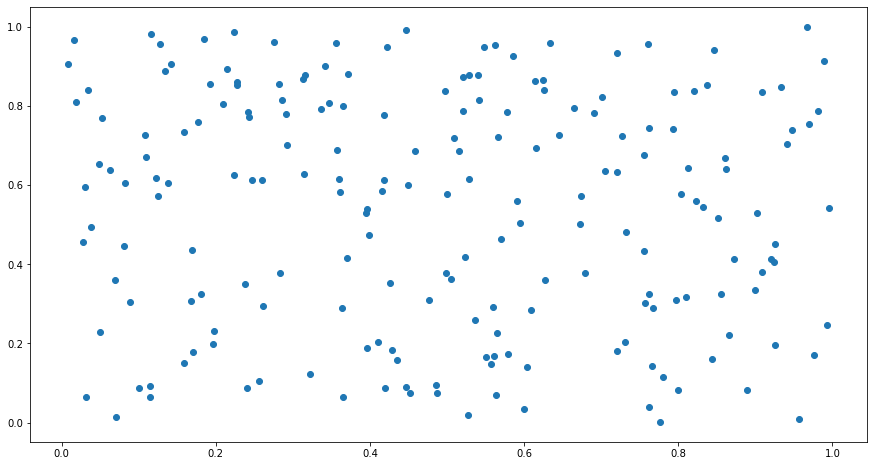

In [3]:
# plotting some numbers(200)
fig = plt.figure(figsize=(15,8))
plt.scatter(arr[:200,0],arr[:200,1])
plt.show()

Steps to be follow:

In [4]:
#The centroid of al the points
centroid = np.mean(arr,axis=0)
centroid

array([0.49990168, 0.50025046])

Find euclidean distance between points

In [5]:

%%time
dist = np.sqrt(np.sum((arr-centroid)**2 , axis=1))
dist

Wall time: 78.2 ms


array([0.23052036, 0.13906984, 0.29550005, ..., 0.04912157, 0.39616303,
       0.4482014 ])

In [6]:
#checking the shape of dist array
dist.shape

(1000000,)

In [7]:
#reshape the data to do further calculations
dist = dist.reshape(-1,1)
dist

array([[0.23052036],
       [0.13906984],
       [0.29550005],
       ...,
       [0.04912157],
       [0.39616303],
       [0.4482014 ]])

In [8]:
# Now, the shape of "dist" array is changed.
dist.shape

(1000000, 1)

In [9]:
# Adding(concatenate) the newly calulated distance 'dist' array as the new column to the existing array
arr_dist = np.hstack((arr,dist))
arr_dist

array([[0.56575455, 0.72116455, 0.23052036],
       [0.4186299 , 0.61310133, 0.13906984],
       [0.57759078, 0.78535515, 0.29550005],
       ...,
       [0.52831213, 0.46017834, 0.04912157],
       [0.36637144, 0.12726946, 0.39616303],
       [0.94157214, 0.57648496, 0.4482014 ]])

###### {b}Find K-nearest neighbours

In [10]:
def K_nearest_neighbours(array,point,k):
    #centroid = np.mean(array,axis=0)
    dist = np.sum((array-point)**2,  axis=1)
    dist = dist.reshape(-1,1)
    arr_dist = np.hstack((array,dist))
    arr_ = arr_dist[arr_dist[:,2].argsort()]
    print(arr_[:k])
    print("The given point is {} ".format(point))
    print("The nearest k points are: \n {} ".format(arr_[:k,:2]))
    
    fig = plt.figure(figsize=(12,7))
    #plt.scatter(array[:,0], array[:,1])
    plt.plot(point[0],point[1],'rD')
    plt.plot(arr_[:k,0], arr_[:k,1], 'b*')
    plt.show()

In [11]:
# Create a matrix of order (1M,2)
array = np.random.randint(10000, size=(1000000,2))
arr.shape

(1000000, 2)

In [12]:
array[:,0].min(), array[:,0].max()

(0, 9999)

In [13]:
array[:,1].min(), array[:,1].max()

(0, 9999)

In [14]:
k = int(input("Enter how many nearest points you want to find: "))
point = np.array(list(map(float, input("Enter the co-ordinate of a random point").split())))

Enter how many nearest points you want to find: 3
Enter the co-ordinate of a random point100 200


[[ 98. 204.  20.]
 [100. 193.  49.]
 [106. 192. 100.]]
The given point is [100. 200.] 
The nearest k points are: 
 [[ 98. 204.]
 [100. 193.]
 [106. 192.]] 


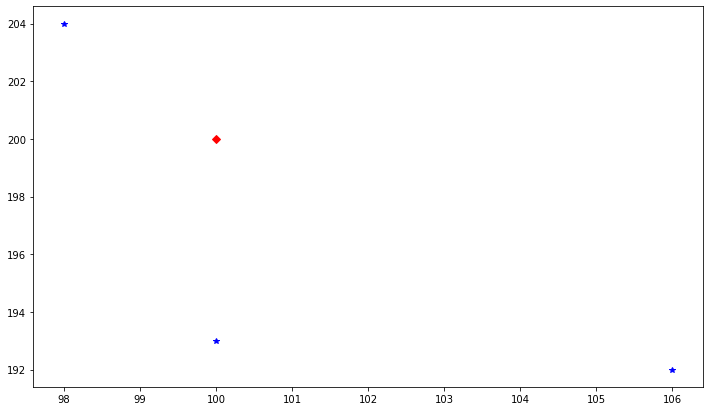

In [15]:
K_nearest_neighbours(array,point,k)

##### END